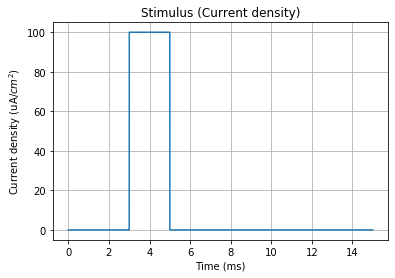

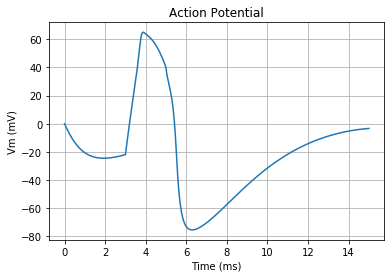

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import odeint


gK = 36.0 #(mS/cm^2)
gNa = 120.0 #mS/cm^2)
gL = 0.3 #(mS/cm^2)
Cm = 0.9 #(uF/cm^2)
VK = -90.0 #(mV)
VNa = 65.0 #(mV)
Vl = 10.613 #(mV)

T = np.linspace(0,15, 10000)

# Potassium ion-channel rate functions
def alpha_n(Vm):
    return (0.01 * (10.0 - Vm)) / (np.exp(1.0 - (0.1 * Vm)) - 1.0)
def beta_n(Vm):
    return 0.125 * np.exp(-Vm / 80.0)

# Sodium ion-channel rate functions
def alpha_m(Vm):
    return (0.1 * (25.0 - Vm)) / (np.exp(2.5 - (0.1 * Vm)) - 1.0)
def beta_m(Vm):
    return 4.0 * np.exp(-Vm / 18.0)
def alpha_h(Vm):
    return 0.07 * np.exp(-Vm / 20.0)
def beta_h(Vm):
    return 1.0 / (np.exp(3.0 - (0.1 * Vm)) + 1.0)

'''

Potassium and sodium rate functions  cited from https://demonstrations.wolfram.com/TheAlphaAndBetaComponentsOfTheHodgkinHuxleyModel/ 


'''


# n, m, and h steady-state values

def n_inf(Vm=0.0):
    return alpha_n(Vm) / (alpha_n(Vm) + beta_n(Vm))
def m_inf(Vm=0.0):
    return alpha_m(Vm) / (alpha_m(Vm) + beta_m(Vm))
def h_inf(Vm=0.0):
    return alpha_h(Vm) / (alpha_h(Vm) + beta_h(Vm))
def inStim(t):
    if 3.0 < t < 5.0:
        return 100.0
    
    return 0.0
  

# Compute derivatives
def compute_derivatives(y, t0):
    dy = np.zeros((4,))
    
    Vm = y[0]
    n = y[1]
    m = y[2]
    h = y[3]
    
    # dVm/dt
    GK = (gK / Cm) * np.power(n, 4.0)
    GNa = (gNa / Cm) * np.power(m, 3.0) * h
    GL = gL / Cm
    
    dy[0] = (inStim(t0) / Cm) - (GK * (Vm - VK)) - (GNa * (Vm - VNa)) - (GL * (Vm - Vl))
    
    # dn/dt
    dy[1] = (alpha_n(Vm) * (1.0 - n)) - (beta_n(Vm) * n)
    
    # dm/dt
    dy[2] = (alpha_m(Vm) * (1.0 - m)) - (beta_m(Vm) * m)
    
    # dh/dt
    dy[3] = (alpha_h(Vm) * (1.0 - h)) - (beta_h(Vm) * h)
    
    return dy
  
# State (Vm, n, m, h)
Y = np.array([0, n_inf(), m_inf(), h_inf()])

# Solve ODE system
Vy = odeint(compute_derivatives, Y, T)

# Input stimulus
stim = [inStim(t) for t in T]


plt.plot(T, stim)
plt.xlabel('Time (ms)')
plt.ylabel('Current density (uA/$cm^2$)')
plt.title('Stimulus (Current density)')
plt.savefig('singlePulseCurrent.png')
plt.grid()
plt.show()

# Action potential

plt.plot(T, Vy[:, 0])
plt.xlabel('Time (ms)')
plt.ylabel('Vm (mV)')
plt.title('Action Potential')
plt.savefig('singleActionPotential.png')
plt.grid()
plt.show()

In [6]:
gK = 36.0 #(mS/cm^2)
gNa = 120.0 #mS/cm^2)
gL = 0.3 #(mS/cm^2)
Cm = 0.9 #(uF/cm^2)
VK = -90.0 #(mV)
VNa = 65.0 #(mV)
Vl = 10.613 #(mV)

T = np.linspace(0,300, 10000)

# Potassium ion-channel rate functions
def alpha_n(Vm):
    return (0.01 * (10.0 - Vm)) / (np.exp(1.0 - (0.1 * Vm)) - 1.0)
def beta_n(Vm):
    return 0.125 * np.exp(-Vm / 80.0)

# Sodium ion-channel rate functions
def alpha_m(Vm):
    return (0.1 * (25.0 - Vm)) / (np.exp(2.5 - (0.1 * Vm)) - 1.0)
def beta_m(Vm):
    return 4.0 * np.exp(-Vm / 18.0)
def alpha_h(Vm):
    return 0.07 * np.exp(-Vm / 20.0)
def beta_h(Vm):
    return 1.0 / (np.exp(3.0 - (0.1 * Vm)) + 1.0)

'''

Potassium and sodium rate functions  cited from https://demonstrations.wolfram.com/TheAlphaAndBetaComponentsOfTheHodgkinHuxleyModel/ 


'''


# n, m, and h steady-state values

def n_inf(Vm=0.0):
    return alpha_n(Vm) / (alpha_n(Vm) + beta_n(Vm))
def m_inf(Vm=0.0):
    return alpha_m(Vm) / (alpha_m(Vm) + beta_m(Vm))
def h_inf(Vm=0.0):
    return alpha_h(Vm) / (alpha_h(Vm) + beta_h(Vm))

def inStim(t):
    if 3.0 < t < 5.0:
        return 100.0
    elif 45 < t < 47:
        return 75
    elif 85 < t < 87:
        return 50
    elif 125 < t < 127:
        return 25
    elif 165 < t < 167:
        return 15
    elif 205 < t < 207:
        return 10
    elif 245 < t< 247:
        return 8
    return 0.0
  

# Compute derivatives
def compute_derivatives(y, t0):
    dy = np.zeros((4,))
    
    Vm = y[0]
    n = y[1]
    m = y[2]
    h = y[3]
    
    # dVm/dt
    GK = (gK / Cm) * np.power(n, 4.0)
    GNa = (gNa / Cm) * np.power(m, 3.0) * h
    GL = gL / Cm
    
    dy[0] = (inStim(t0) / Cm) - (GK * (Vm - VK)) - (GNa * (Vm - VNa)) - (GL * (Vm - Vl))
    
    # dn/dt
    dy[1] = (alpha_n(Vm) * (1.0 - n)) - (beta_n(Vm) * n)
    
    # dm/dt
    dy[2] = (alpha_m(Vm) * (1.0 - m)) - (beta_m(Vm) * m)
    
    # dh/dt
    dy[3] = (alpha_h(Vm) * (1.0 - h)) - (beta_h(Vm) * h)
    
    return dy
  
# State (Vm, n, m, h)
Y = np.array([0, n_inf(), m_inf(), h_inf()])

# Solve ODE system
Vy = odeint(compute_derivatives, Y, T)

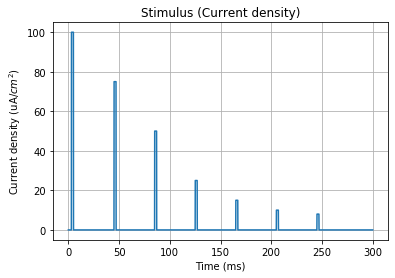

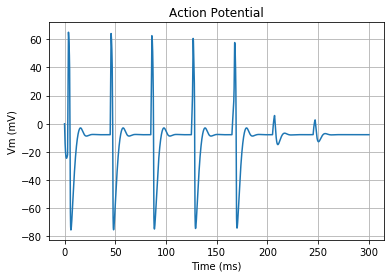

In [7]:
# Input stimulus
stim = [inStim(t) for t in T]

plt.plot(T, stim)
plt.xlabel('Time (ms)')
plt.ylabel('Current density (uA/$cm^2$)')
plt.title('Stimulus (Current density)')
plt.savefig('multiPulseCurrent.png')
plt.grid()
plt.show()

# Action potential

plt.plot(T, Vy[:, 0])
plt.xlabel('Time (ms)')
plt.ylabel('Vm (mV)')
plt.title('Action Potential')
plt.savefig('multiActionPotential.png')
plt.grid()
plt.show()
